In [1]:
import json  
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [2]:
d = None  
data = None  
with zipfile.ZipFile("./two-sigma-connect-rental-listing-inquiries/train.json.zip", "r") as z:
    for filename in z.namelist():
        #print(filename)
        with z.open(filename) as f:
            data = f.read()
            d = json.loads(data.decode("utf-8"))

In [22]:
imgs = []
with zipfile.ZipFile("./two-sigma-connect-rental-listing-inquiries/images_sample.zip","r") as archive:
    for entry in archive.namelist():
        #print(entry)
        if ".jpg" in entry:
            with archive.open(entry) as file:
                image = Image.open(file)
                print(image.size, image.mode, len(image.getdata()))
                imgs.append(image)


(640, 426) RGB 272640
(640, 426) RGB 272640
(426, 640) RGB 272640
(640, 426) RGB 272640
(640, 426) RGB 272640
(640, 425) RGB 272000
(640, 426) RGB 272640
(344, 544) RGB 187136
(640, 425) RGB 272000
(448, 336) RGB 150528
(448, 336) RGB 150528
(448, 336) RGB 150528
(448, 336) RGB 150528
(448, 336) RGB 150528
(336, 448) RGB 150528
(524, 393) RGB 205932
(540, 640) RGB 345600
(524, 393) RGB 205932
(524, 393) RGB 205932
(524, 393) RGB 205932
(600, 370) RGB 222000
(600, 371) RGB 222600
(295, 393) RGB 115935
(597, 600) RGB 358200
(295, 393) RGB 115935
(295, 393) RGB 115935
(295, 393) RGB 115935
(295, 393) RGB 115935
(295, 393) RGB 115935
(426, 640) RGB 272640
(640, 426) RGB 272640
(640, 426) RGB 272640
(640, 426) RGB 272640
(640, 426) RGB 272640
(640, 426) RGB 272640
(426, 640) RGB 272640
(640, 426) RGB 272640
(427, 640) RGB 273280
(640, 426) RGB 272640
(640, 426) RGB 272640
(640, 426) RGB 272640
(640, 423) RGB 270720
(640, 423) RGB 270720
(512, 608) RGB 311296
(640, 423) RGB 270720
(640, 423)

(640, 480) RGB 307200
(640, 480) RGB 307200
(640, 480) RGB 307200
(480, 640) RGB 307200
(480, 640) RGB 307200
(480, 640) RGB 307200
(480, 640) RGB 307200
(480, 640) RGB 307200
(177, 267) RGB 47259
(640, 480) RGB 307200
(640, 480) RGB 307200
(640, 426) RGB 272640
(426, 640) RGB 272640
(426, 640) RGB 272640
(426, 640) RGB 272640
(640, 359) RGB 229760
(640, 359) RGB 229760
(640, 359) RGB 229760
(640, 359) RGB 229760
(640, 359) RGB 229760
(640, 359) RGB 229760
(640, 479) RGB 306560
(640, 426) RGB 272640
(479, 640) RGB 306560
(479, 640) RGB 306560


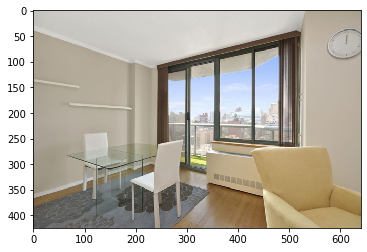

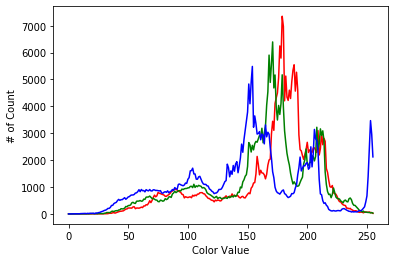

In [23]:
# this is a visualization cell
colourImg = imgs[5]
plt.imshow(colourImg); plt.show()
r, g, b = colourImg.split() 
len(r.histogram())
plt.plot(r.histogram(),'r');
plt.plot(g.histogram(),'g');
plt.plot(b.histogram(),'b'); 
plt.xlabel('Color Value')
plt.ylabel('# of Count')
plt.show()


In [17]:
#keys are copied from : https://machinelearningmastery.com/clean-text-machine-learning-python/
stopWordsDelete = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']

In [18]:
des = df['description']
print(des[0])
des = des.str.lower().str.replace('<.*?>',' ')
print(des[0])
des = des.str.replace('[0-9][0-9][0-9]-[0-9][0-9][0-9]-[0-9][0-9][0-9][0-9]',' ')
print(des[0])
des = des.str.replace('kagglemanager\@renthop\.com',' ')
des = des.str.replace('new york',' ')
des = des.str.replace('<a  website_redacted',' ')
des = des.str.replace('[^\w\s]',' ')
des = des.str.replace('\_',' ')
des = des.str.strip()
# des = des.str.replace('  ',' ')
# des = des.str.replace('  ',' ')
# des = des.str.replace('  ',' ')
# des = des.str.replace('  ',' ')
# des = des.str.replace('  ',' ')
# des = des.str.split(' ')


# # function that filters vowels
# def filterVowels(alphabet):
    
#     if(alphabet in stopWordsDelete):
#         return False
#     else:
#         return True
    
# for lst in des:
#     lst = filter(filterVowels, lst)

print(des[0])

Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a  website_redacted 
spacious 1 bedroom 1 bathroom in williamsburg!apartment features:- renovated eat in kitchen with dishwasher- renovated bathroom- beautiful hardwood floors- lots of sunlight- great closet space- freshly painted- heat and hot water included- live in super nearby l, j, m & g trains !  contact information:kenneth beakexclusive agentc: 064-692-8838email: kagglemanager@renthop.com, text or email to schedule a private viewing!                 <a  we

In [19]:
#histOfWord = des.str.split(expand=True).stack().value_counts()
histOfWord = des.str.split(expand=True)
print(histOfWord)

              0        1          2          3         4            5    \
4        spacious        1    bedroom          1  bathroom           in   
6           brand      new        gut  renovated      true            2   
9            flex        2    bedroom       with      full  pressurized   
10              a    brand        new          3   bedroom            1   
15           over    sized     studio          w  abundant      closets   
...           ...      ...        ...        ...       ...          ...   
124000      there       is        700     square      feet           of   
124002          2  bedroom  apartment       with   updated      kitchen   
124004         no  brokers        fee      never     lived            1   
124008  wonderful   bright    chelsea          2   bedroom    apartment   
124009      prime  midtown       east        off      park          ave   

                 6            7               8           9    ...   673  \
4       williamsburg   

In [20]:
wordCount = histOfWord.stack().value_counts()

In [21]:
wordCount = wordCount.drop(labels=stopWordsDelete,errors='ignore')

nums = list(range(999999))
nums = list(map(str, nums))
wordCount = wordCount.drop(labels=nums,errors='ignore')

keyWordDelete = ['call','text','email','building','bedroom','please','one', 'two','three','four']
wordCount = wordCount.drop(labels=keyWordDelete,errors='ignore')
wordCount = wordCount.drop(labels='[0-9]*',errors='ignore')

print(wordCount[wordCount > 8000])
wordCount = wordCount[wordCount > 10]
print(wordCount)

apartment      41324
kitchen        31463
room           23632
appliances     20494
floors         20304
space          19824
hardwood       18494
renovated      18386
large          18231
features       17448
stainless      17396
new            17160
laundry        16568
steel          16554
great          16321
high           15715
located        15442
unit           15285
living         15198
contact        15024
bathroom       14193
doorman        13372
windows        13075
full           13011
marble         12484
park           12363
fee            12173
granite        12038
restaurants    12006
closet         11851
floor          11596
spacious       11460
dishwasher     10978
beautiful      10952
location       10945
private        10705
ceilings       10489
area           10470
city           10046
east            9826
views           9746
luxury          9715
elevator        9642
access          9277
home            9192
viewing         9184
amenities       9171
center       

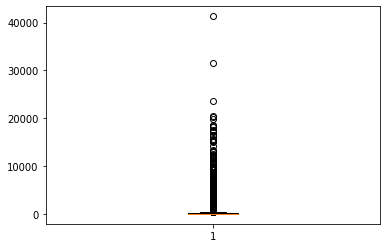

In [22]:
plt.boxplot(wordCount)
plt.show()